In [1]:
import numpy as np
from jupyterthemes import jtplot
jtplot.style()
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

,milk_count,height [cm],weight [kg],meat weight [s]
0,0,44,3,0.7
1,20,95,4,0.7
2,40,200,28,0.8
3,60,410,113,1.0
4,80,752,407,1.7
5,100,1381,1373,4.1


80000.0


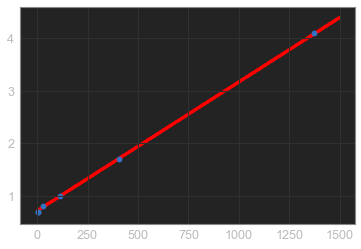

In [2]:
frame = pd.read_csv("data.csv", header=0)

frame

#frame.plot.line(0,0,marker="o")
#frame.plot.line(0,1,marker="o")
#frame.plot.line(1,1,marker="o")
#frame.plot.line(2,2,marker="o")

#(4.1-0.8)/(1373-28)(x-1373)+4.1
def funcMeatW(w):
    return 3.3/1345.0*w - 3.3/1345.0*1373.0 + 4.1

def invFuncMeatW(meatW):
    return 1345.0/3.3 * (meatW + 3.3/1345.0 * 1373.0 - 4.1)
        
print(invFuncMeatW(funcMeatW(80000)))

X_prac = range(0, 1500, 1)
y_prac = [ funcMeatW(x) for x in X_prac ]

plt.scatter(X_prac, y_prac, color="red",s=5)

X = frame.loc[:, "weight [kg]"].values.reshape(-1,1)
y = frame.loc[:, "meat weight [s] "]

plt.scatter(X, y)


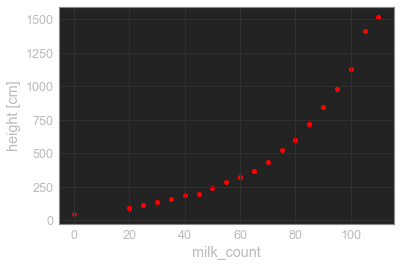

In [3]:
frame = pd.read_csv("wh_data.csv", header=0)

#frame

frame.plot.scatter(0,1,marker="o", color="red")


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

mod = LinearRegression()

quadric = PolynomialFeatures(degree=2)

X = frame.loc[:, "height [cm]"].values.reshape(-1,1)
y = frame.loc[:, "weight [kg]"].values

X_quad = quadric.fit_transform(X)

X[0:20]
X_quad[0:20]

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_fit[0:20]


array([[ 44],
       [ 90],
       [ 90],
       [ 90],
       [110],
       [110],
       [110],
       [115],
       [115],
       [134],
       [134],
       [159],
       [159],
       [185],
       [185],
       [199],
       [199],
       [238],
       [238],
       [284]], dtype=int64)

array([[  1.00000000e+00,   4.40000000e+01,   1.93600000e+03],
       [  1.00000000e+00,   9.00000000e+01,   8.10000000e+03],
       [  1.00000000e+00,   9.00000000e+01,   8.10000000e+03],
       [  1.00000000e+00,   9.00000000e+01,   8.10000000e+03],
       [  1.00000000e+00,   1.10000000e+02,   1.21000000e+04],
       [  1.00000000e+00,   1.10000000e+02,   1.21000000e+04],
       [  1.00000000e+00,   1.10000000e+02,   1.21000000e+04],
       [  1.00000000e+00,   1.15000000e+02,   1.32250000e+04],
       [  1.00000000e+00,   1.15000000e+02,   1.32250000e+04],
       [  1.00000000e+00,   1.34000000e+02,   1.79560000e+04],
       [  1.00000000e+00,   1.34000000e+02,   1.79560000e+04],
       [  1.00000000e+00,   1.59000000e+02,   2.52810000e+04],
       [  1.00000000e+00,   1.59000000e+02,   2.52810000e+04],
       [  1.00000000e+00,   1.85000000e+02,   3.42250000e+04],
       [  1.00000000e+00,   1.85000000e+02,   3.42250000e+04],
       [  1.00000000e+00,   1.99000000e+02,   3.9601000

array([[44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]], dtype=int64)

array([ 0.        ,  0.00192257,  0.00070368])

-1.8186540436402083

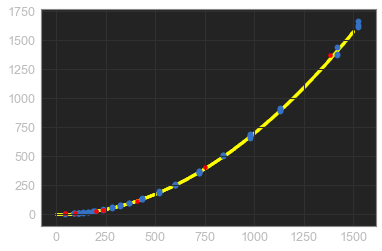

In [5]:
mod_quad = mod.fit(X_quad, y)
y_pred = mod_quad.predict(quadric.fit_transform(X_fit))

#plt.scatter(X_fit, y_pred, )
#plt.scatter(X_fit, y_pred_cub)


def funcW(h):
    return 0.00070368 * h * h + 0.00192257 * h - 1.81865
def gradFuncW(h):
    return 2 * 0.00070368 * h + 0.00192257 

mod_quad.coef_
mod_quad.intercept_

X_prac = range(0, 1500, 1)

y_prac = [funcW(x) for x in X_prac]

plt.scatter(np.array(X_prac), np.array(y_prac), color="yellow", s=5)
plt.scatter(X, y)

X_data = [44, 95, 236,  200, 410, 752, 1381]
y_data = [3, 4, 31, 28, 113, 407, 1373]

plt.scatter(X_data, y_data, color="red", s=20)


In [6]:

def invFuncW(w, allowError=0.00001):
    #require weight
    inter = w 
    #funcW(h) = 14000 equals funcW(h) - 14000 = 0
    
    def targetFunc(x):
        return funcW(x) - inter
    #gradTargetFunc = gradFuncW

    x_now = 5000

    for i in range(1000):
        y_now = targetFunc(x_now)
        grad_now = gradFuncW(x_now)
        #0 = grad_now(x-x_now)+y_now
        #x-x_now = -y_now/grad_now
        x_new = x_now - y_now/grad_now
        error = abs(targetFunc(x_new) - targetFunc(x_now))
        x_now = x_new
        if(error < allowError):
            break;

    print("height:", x_now)
    print("error:", error)
    print("roop", i)
    return x_now

invFuncW(14000)

height: 4459.350603521185
error: 6.363206921378151e-06
roop 3


4459.350603521185